In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data2017_east1a_x_path = '/content/drive/MyDrive/Colab Notebooks/Cloud/data_x2017.csv'
data2017_east1a_y_path = '/content/drive/MyDrive/Colab Notebooks/Cloud/data_y_2017.csv'

In [4]:
data_x = pd.read_csv(data2017_east1a_x_path, delimiter=',', header=None, low_memory=False)

In [5]:
data_y = pd.read_csv(data2017_east1a_y_path, delimiter=',', header=None, low_memory=False)

In [6]:
data_x

,0,1,2,3,4,5
0,year,month,day,hour,minute,second
1,2017.0,3.0,29.0,21.0,54.0,1.0
2,2017.0,4.0,6.0,12.0,6.0,42.0
3,2017.0,5.0,16.0,22.0,6.0,40.0
4,2017.0,6.0,2.0,11.0,1.0,4.0
...,...,...,...,...,...,...
207468,2017.0,8.0,7.0,7.0,44.0,1.0
207469,2017.0,7.0,9.0,9.0,39.0,1.0
207470,2017.0,8.0,28.0,2.0,42.0,26.0
207471,2017.0,9.0,15.0,19.0,8.0,5.0


In [5]:
# Importing the libraries
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

from sqlalchemy.sql.operators import not_endswith_op
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline
trainAcc = []
testAcc = []

Epoch 1/5
1006/1006 [==============================] - 45s 37ms/step - loss: 0.0115
Epoch 2/5
1006/1006 [==============================] - 41s 41ms/step - loss: 0.0084
Epoch 3/5
1006/1006 [==============================] - 38s 37ms/step - loss: 0.0080
Epoch 4/5
1006/1006 [==============================] - 36s 36ms/step - loss: 0.0077
Epoch 5/5
4714/4714 [==============================] - 26s 6ms/step
r2 Test: 0.020381341240147344
mse Test: 0.005800874095112831
rmse Test: 0.07616346955800288
MAPE Test: 0.27184878743440305
MAE Test: 0.0326160031488075


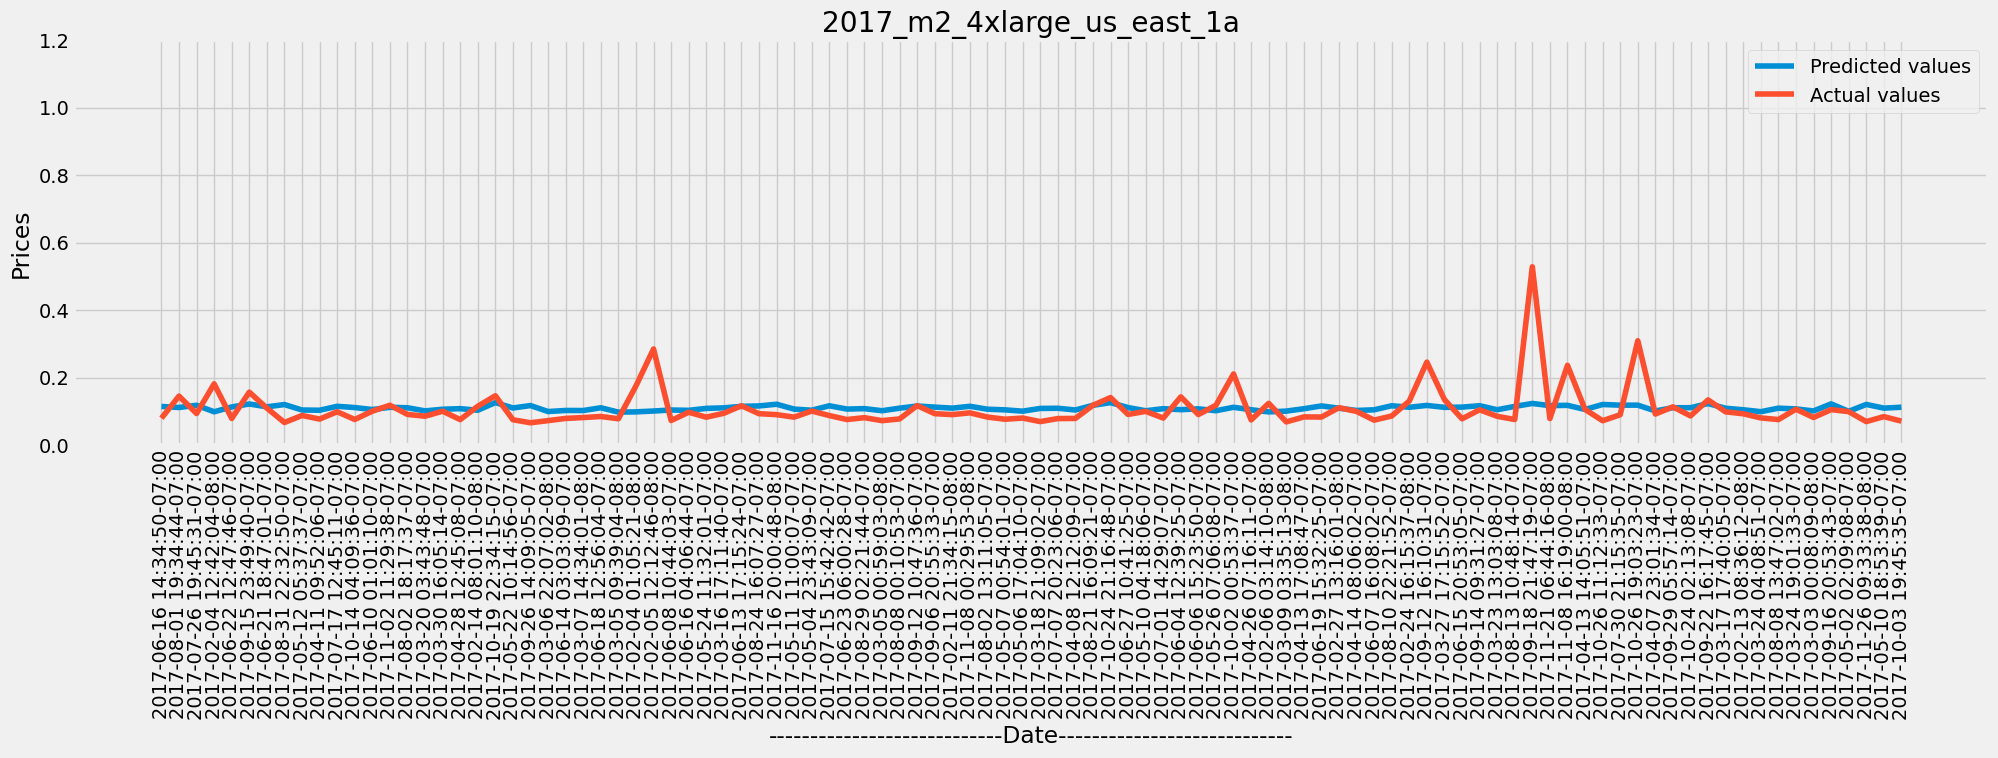

Epoch 1/5
808/808 [==============================] - 39s 37ms/step - loss: 0.0142
Epoch 2/5
808/808 [==============================] - 35s 43ms/step - loss: 0.0102
Epoch 3/5
808/808 [==============================] - 31s 39ms/step - loss: 0.0094
Epoch 4/5
808/808 [==============================] - 30s 37ms/step - loss: 0.0090
Epoch 5/5
3786/3786 [==============================] - 23s 6ms/step
r2 Test: 0.01630886794879083
mse Test: 0.008347525473428728
rmse Test: 0.09136479340221117
MAPE Test: 0.29022877957621
MAE Test: 0.03621701210997751


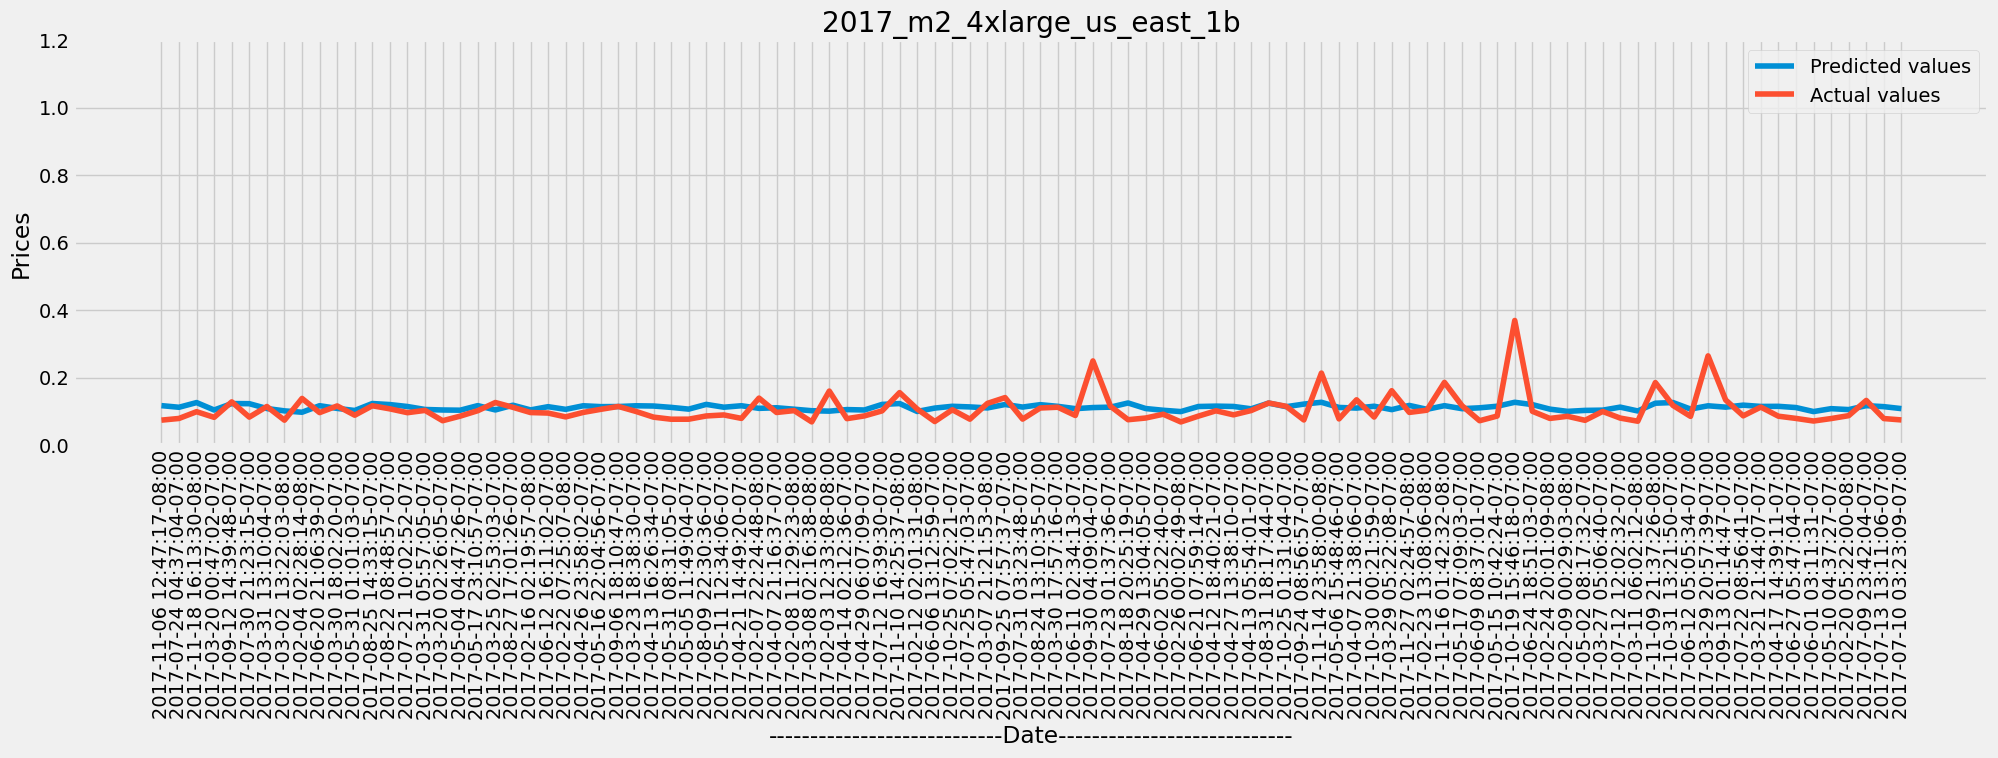

Epoch 1/5
242/242 [==============================] - 17s 33ms/step - loss: 0.0217
Epoch 2/5
242/242 [==============================] - 11s 46ms/step - loss: 0.0162
Epoch 3/5
242/242 [==============================] - 8s 33ms/step - loss: 0.0144
Epoch 4/5
242/242 [==============================] - 11s 46ms/step - loss: 0.0137
Epoch 5/5
1131/1131 [==============================] - 7s 6ms/step
r2 Test: -0.01662420114565788
mse Test: 0.007924939600017656
rmse Test: 0.08902212983307946
MAPE Test: 0.3161062856696367
MAE Test: 0.03366296090426601


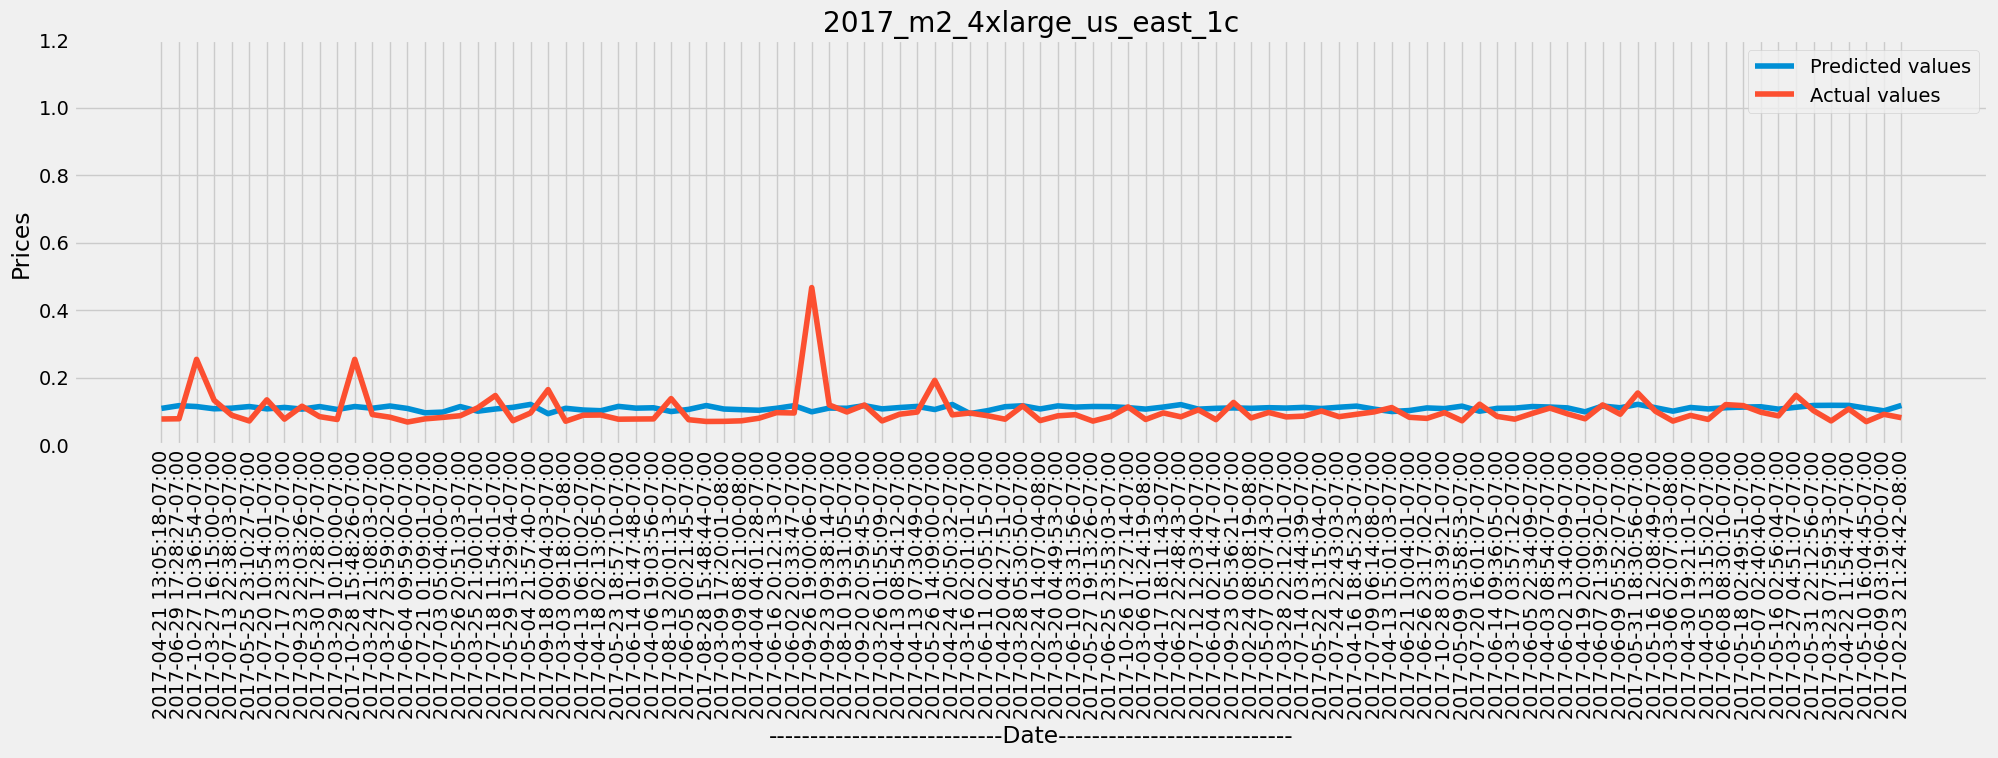

Epoch 1/5
969/969 [==============================] - 47s 40ms/step - loss: 0.0232
Epoch 2/5
969/969 [==============================] - 39s 40ms/step - loss: 0.0197
Epoch 3/5
969/969 [==============================] - 39s 40ms/step - loss: 0.0190
Epoch 4/5
969/969 [==============================] - 42s 43ms/step - loss: 0.0187
Epoch 5/5
4539/4539 [==============================] - 28s 6ms/step
r2 Test: 0.011369015142522976
mse Test: 0.015367963606458368
rmse Test: 0.12396759095206443
MAPE Test: 0.32408704499886803
MAE Test: 0.04633782047744042


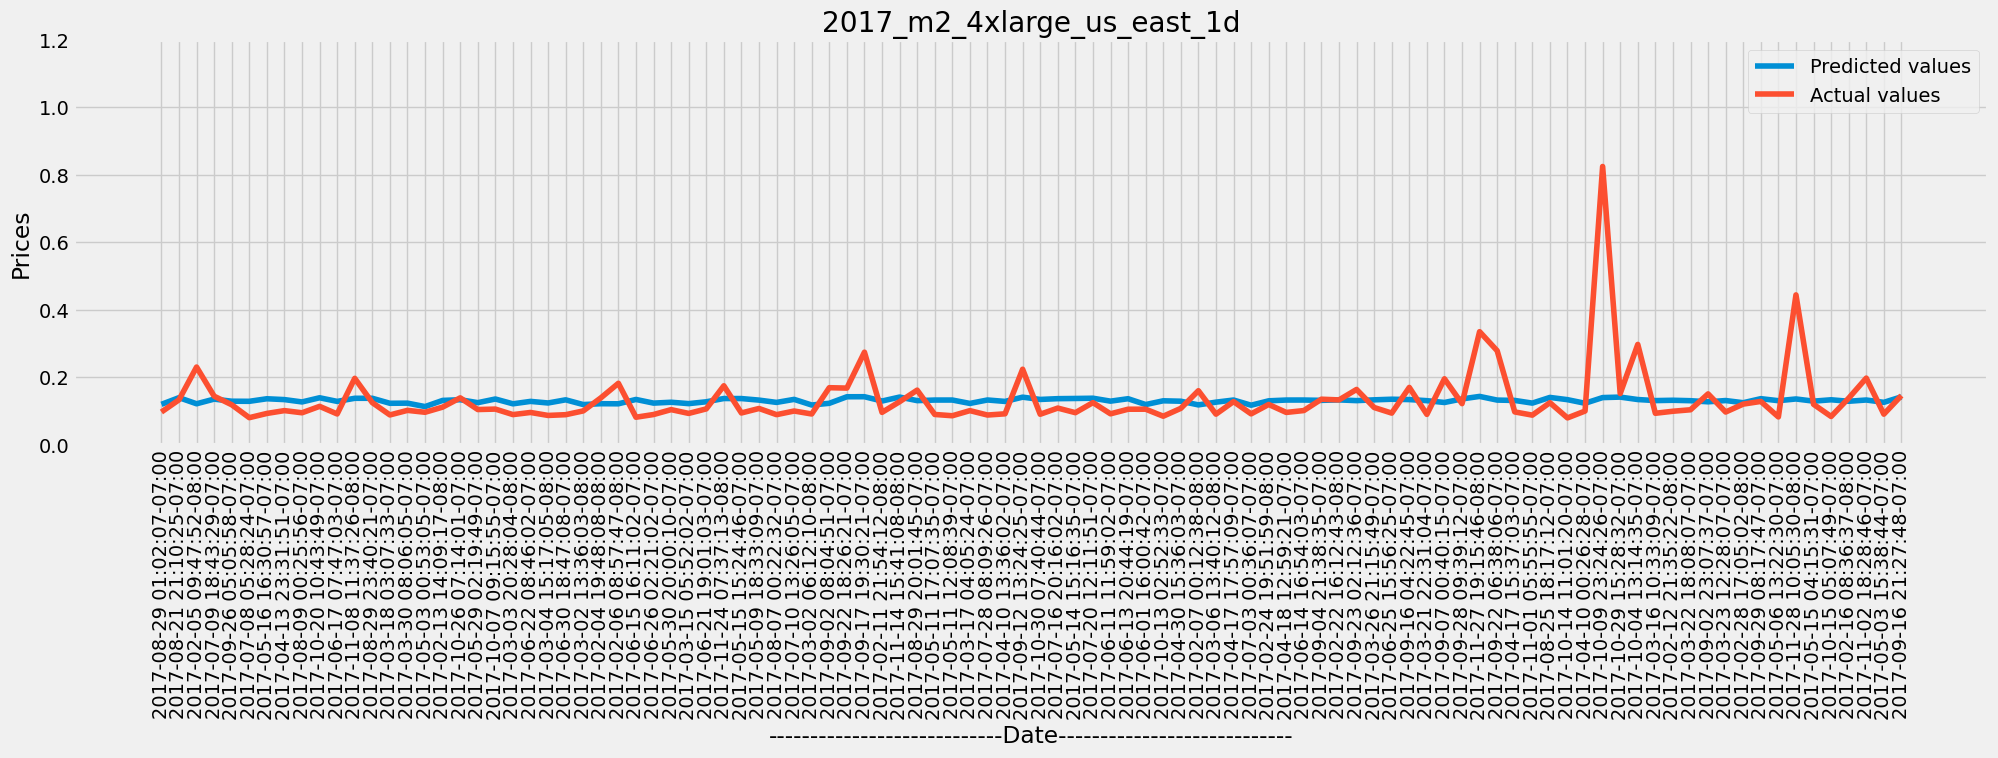

In [13]:
files=['/content/drive/MyDrive/Colab Notebooks/Cloud/2017_m2_4xlarge_us_east_1a','/content/drive/MyDrive/Colab Notebooks/Cloud/2017_m2_4xlarge_us_east_1b',
       '/content/drive/MyDrive/Colab Notebooks/Cloud/2017_m2_4xlarge_us_east_1c',
       '/content/drive/MyDrive/Colab Notebooks/Cloud/2017_m2_4xlarge_us_east_1d']
for fileName in files:
  data_path = fileName
  data = pd.read_csv(data_path, delimiter=',', header=None, low_memory=False)
  data.columns = ['Price', 'Date','OS','Region','year', 'month','day', 'hour', 'minute', 'second']
  data = data.drop(0)
  data.isna().any(axis=1).sum()
  data_temp = data
  data.dropna(axis=1)
  data_y = data['Price']
  data_x = data.drop(['Price'], axis=1)
  data_y = data_y.reset_index()
  data_x = data_x.reset_index()
  data_y = data_y.drop(['index'], axis=1)
  data_y['Price'] = data_y['Price'].astype(float)
  data_x = data_x.drop(['Date','OS','index', 'Region'], axis=1)
  data_x = data_x.astype(float)
  X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state=42, shuffle = False)
  trainAcc = []
  testAcc = []
  # The GRU architecture
  regressorGRU = Sequential()
  # First GRU layer with Dropout regularisation
  regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
  regressorGRU.add(Dropout(0.2))
  # Second GRU layer
  regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
  regressorGRU.add(Dropout(0.2))
  # Third GRU layer
  regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
  regressorGRU.add(Dropout(0.2))
  # Fourth GRU layer
  regressorGRU.add(GRU(units=50, activation='tanh'))
  regressorGRU.add(Dropout(0.2))
  # The output layer
  regressorGRU.add(Dense(units=1))

  # Compiling the RNN
  regressorGRU.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
  # Fitting to the training set
  regressorGRU.fit(X_train,Y_train,epochs=5,batch_size=150)

  y_pred_test = regressorGRU.predict(X_test)
  y_pred_train = regressorGRU.predict(X_train)
  testAcc.append(mean_absolute_percentage_error(Y_test, y_pred_test))
  MAE_test = mean_absolute_error(Y_test, y_pred_test)
  MAPE_test = mean_absolute_percentage_error(Y_test, y_pred_test)
  mse_test = mean_squared_error(Y_test, y_pred_test)
  rmse_test = np.sqrt(mse_test)
  r2_test = r2_score(Y_test, y_pred_test)
  print(f"r2 Test: {r2_test}")
  print(f"mse Test: {mse_test}")
  print(f"rmse Test: {rmse_test}")
  print(f"MAPE Test: {MAPE_test}")
  print(f"MAE Test: {MAE_test}")
  Y_test_array = Y_test['Price'].values
  Y_test_array = np.array(Y_test_array)
  test_range = Y_test['Price'].values
  x_values = np.arange(len(Y_test_array))
  test_array = [float(value) for value in test_range.tolist()]
  Y_test_array = Y_test['Price'].values

  tested_data_index = Y_test.iloc[:, :0]
  Y_test_data = pd.DataFrame(Y_test, index=tested_data_index.index)
  dfilter = pd.DataFrame(index=tested_data_index.index)
  filteredList = dfilter.index.tolist();
  i = 0
  j = 0
  dictionary_Predict_value = {}
  dictionary_Test_value = {}

  for val in y_pred_test:
    dictionary_Predict_value[filteredList[i]]=val
    i=i+1
  for val in Y_test['Price'].values:
    dictionary_Test_value[filteredList[j]]=float(val)
    j=j+1

  Y_test_data = pd.DataFrame(Y_test, index=Y_test.index)
  Y_test_index = Y_test_data[Y_test_data['Price'].notna()]
  linux_values = pd.DataFrame(index=Y_test_index.index).index.tolist()
  test_array_ = []
  pred_array_ = []
  x_values = []
  for key in linux_values:
    test_array_.append(dictionary_Test_value[key])
    pred_array_.append(dictionary_Predict_value[key])
    x_values.append(data_temp.iloc[key]['Date'])

  x_lables = np.arange(len(x_values))
  test_array_values = [float(value) for value in test_array_]
  pred_array_values = [float(value) for value in pred_array_]
  rcParams['figure.figsize'] = 22, 5
    # Plot the data
  plt.plot(pred_array_values[0:100])

  plt.plot(test_array_values[0:100])

  plt.ylim(0, 1.2)
  # plt.yticks([0,0.05,0.10,0.15,0.20,.25,.30,.35,.40,.45,.50,.55,.60])
  # plt.yticks([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,.08,.09,.10])

    #plt.xlim(0, 150)
  plt.xticks(x_lables[0:100], x_values[0:100], rotation=90)
  plt.legend(['Predicted values','Actual values'])
    # Add labels and legend
  plt.ylabel('Prices')
  plt.xlabel("----------------------------Date----------------------------")
  plt.title(fileName.split('/')[-1])
    # Show the plot
  plt.show();

In [14]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh',recurrent_activation='sigmoid'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh',recurrent_activation='sigmoid'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh',recurrent_activation='sigmoid'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh',recurrent_activation='sigmoid'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,Y_train,epochs=5,batch_size=150)

Epoch 1/5
969/969 [==============================] - 47s 40ms/step - loss: 0.0255
Epoch 2/5
969/969 [==============================] - 35s 36ms/step - loss: 0.0202
Epoch 3/5
969/969 [==============================] - 37s 38ms/step - loss: 0.0193
Epoch 4/5
969/969 [==============================] - 35s 36ms/step - loss: 0.0189
Epoch 5/5
969/969 [==============================] - 35s 36ms/step - loss: 0.0186


4539/4539 [==============================] - 24s 5ms/step
r2 Test: 0.02022228811876925
mse Test: 0.015230342209819047
rmse Test: 0.12341127262053109
MAPE Test: 0.35587190376058786
MAE Test: 0.048366665539667085


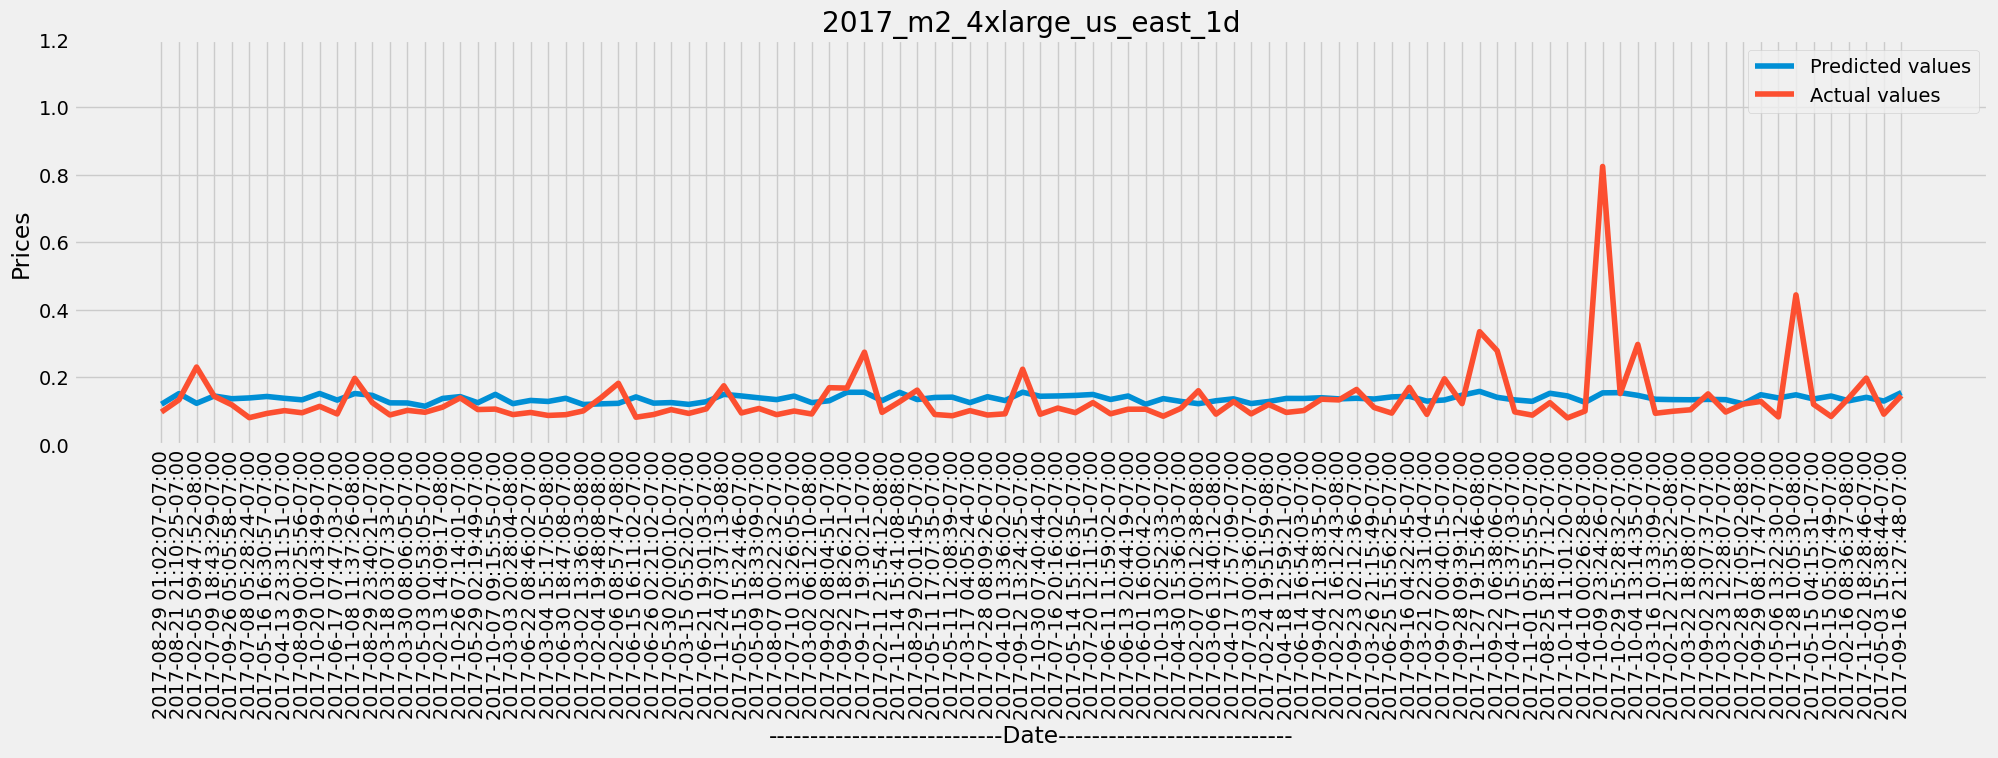

In [15]:
y_pred_test = regressorGRU.predict(X_test)
y_pred_train = regressorGRU.predict(X_train)
testAcc.append(mean_absolute_percentage_error(Y_test, y_pred_test))
MAE_test = mean_absolute_error(Y_test, y_pred_test)
MAPE_test = mean_absolute_percentage_error(Y_test, y_pred_test)
mse_test = mean_squared_error(Y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, y_pred_test)
print(f"r2 Test: {r2_test}")
print(f"mse Test: {mse_test}")
print(f"rmse Test: {rmse_test}")
print(f"MAPE Test: {MAPE_test}")
print(f"MAE Test: {MAE_test}")
Y_test_array = Y_test['Price'].values
Y_test_array = np.array(Y_test_array)
test_range = Y_test['Price'].values
x_values = np.arange(len(Y_test_array))
test_array = [float(value) for value in test_range.tolist()]
Y_test_array = Y_test['Price'].values

tested_data_index = Y_test.iloc[:, :0]
Y_test_data = pd.DataFrame(Y_test, index=tested_data_index.index)
dfilter = pd.DataFrame(index=tested_data_index.index)
filteredList = dfilter.index.tolist();
i = 0
j = 0
dictionary_Predict_value = {}
dictionary_Test_value = {}

for val in y_pred_test:
  dictionary_Predict_value[filteredList[i]]=val
  i=i+1
for val in Y_test['Price'].values:
  dictionary_Test_value[filteredList[j]]=float(val)
  j=j+1

Y_test_data = pd.DataFrame(Y_test, index=Y_test.index)
Y_test_index = Y_test_data[Y_test_data['Price'].notna()]
linux_values = pd.DataFrame(index=Y_test_index.index).index.tolist()
test_array_ = []
pred_array_ = []
x_values = []
for key in linux_values:
  test_array_.append(dictionary_Test_value[key])
  pred_array_.append(dictionary_Predict_value[key])
  x_values.append(data_temp.iloc[key]['Date'])

x_lables = np.arange(len(x_values))
test_array_values = [float(value) for value in test_array_]
pred_array_values = [float(value) for value in pred_array_]
rcParams['figure.figsize'] = 22, 5
    # Plot the data
plt.plot(pred_array_values[0:100])

plt.plot(test_array_values[0:100])

plt.ylim(0, 1.2)
  # plt.yticks([0,0.05,0.10,0.15,0.20,.25,.30,.35,.40,.45,.50,.55,.60])
  # plt.yticks([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,.08,.09,.10])

    #plt.xlim(0, 150)
plt.xticks(x_lables[0:100], x_values[0:100], rotation=90)
plt.legend(['Predicted values','Actual values'])
    # Add labels and legend
plt.ylabel('Prices')
plt.xlabel("----------------------------Date----------------------------")
plt.title(fileName.split('/')[-1])
    # Show the plot
plt.show();

Epoch 1/5
8/8 [==============================] - 9s 30ms/step - loss: 0.1574
Epoch 2/5
8/8 [==============================] - 0s 29ms/step - loss: 0.1152
Epoch 3/5
8/8 [==============================] - 0s 32ms/step - loss: 0.1167
Epoch 4/5
8/8 [==============================] - 0s 31ms/step - loss: 0.1112
Epoch 5/5
35/35 [==============================] - 0s 5ms/step
r2 Test: 0.04677109981829963
mse Test: 0.09887161688171801
rmse Test: 0.3144385740994861
MAPE Test: 1.3705381456603374
MAE Test: 0.26334723535716037


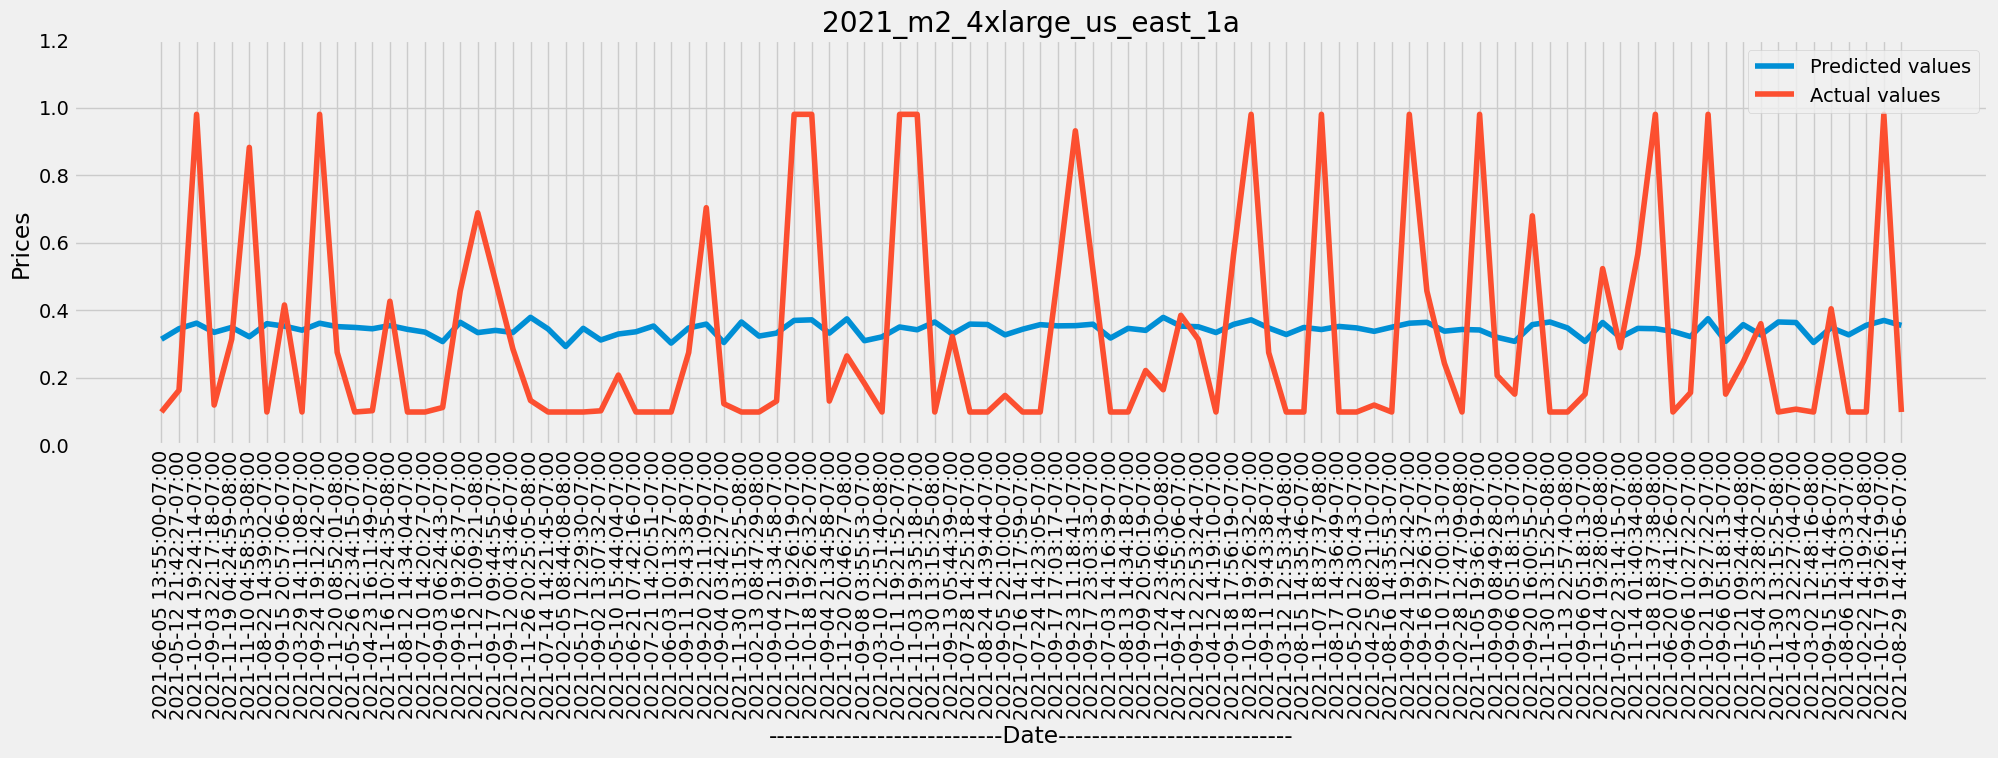

Epoch 1/5
8/8 [==============================] - 11s 33ms/step - loss: 0.0582
Epoch 2/5
8/8 [==============================] - 0s 31ms/step - loss: 0.0181
Epoch 3/5
8/8 [==============================] - 0s 32ms/step - loss: 0.0203
Epoch 4/5
8/8 [==============================] - 0s 33ms/step - loss: 0.0179
Epoch 5/5
34/34 [==============================] - 0s 6ms/step
r2 Test: -0.06752345424757289
mse Test: 0.006788531614528926
rmse Test: 0.08239254586750507
MAPE Test: 0.34653874384131134
MAE Test: 0.056911212391806486


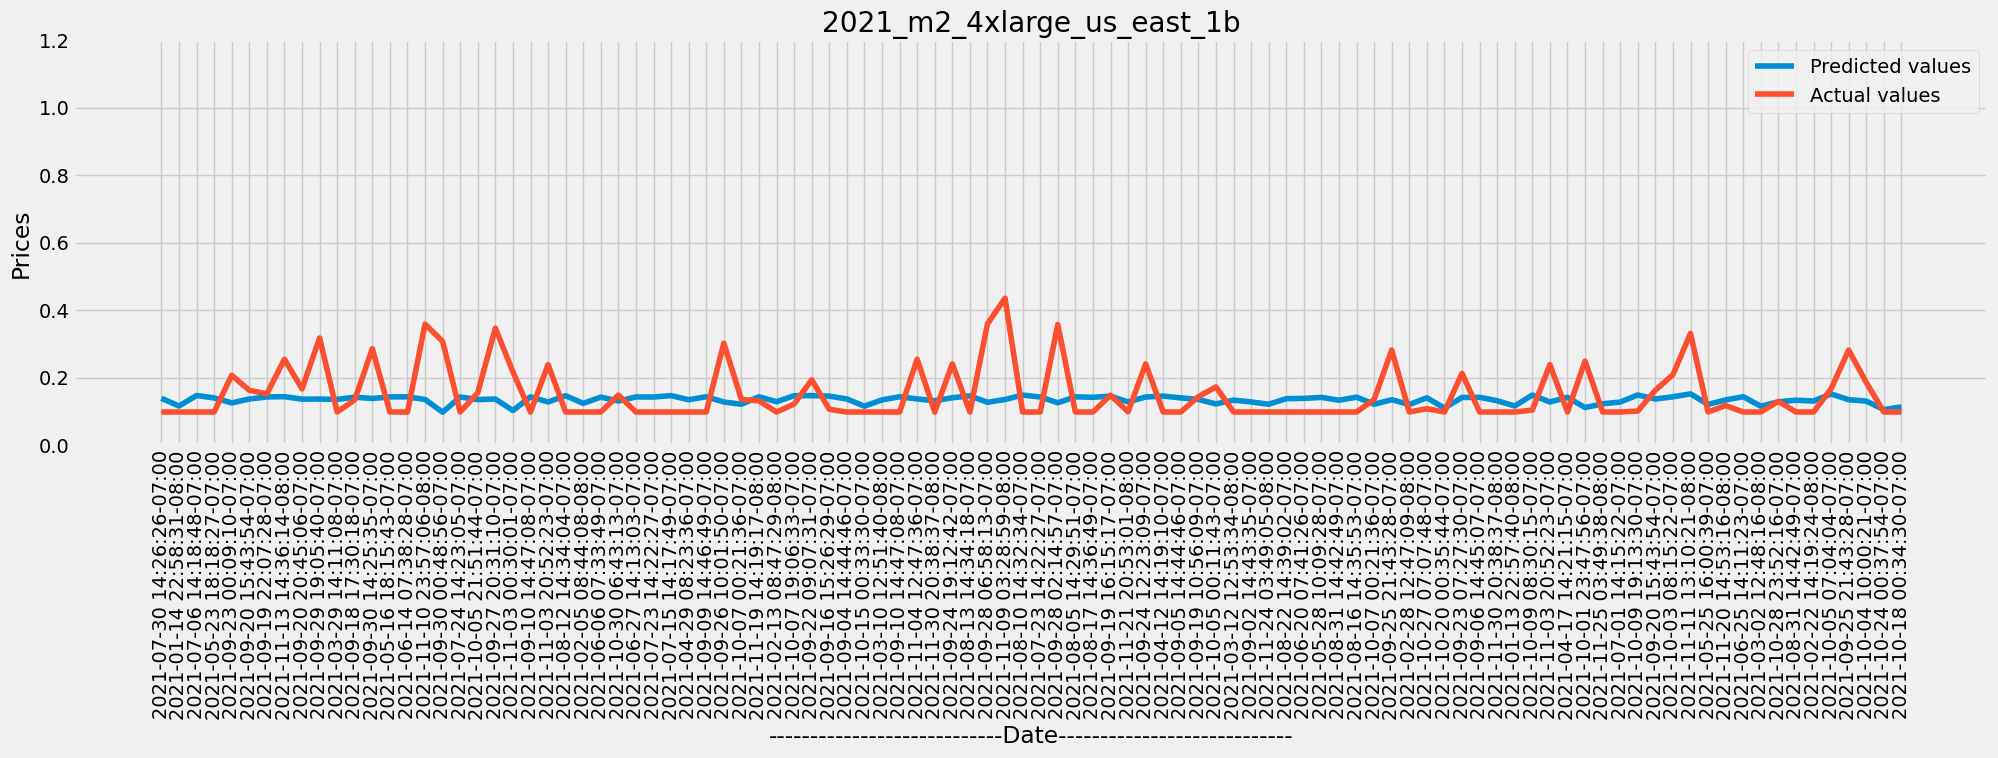

Epoch 1/5
7/7 [==============================] - 10s 35ms/step - loss: 0.0481
Epoch 2/5
7/7 [==============================] - 0s 33ms/step - loss: 0.0242
Epoch 3/5
7/7 [==============================] - 0s 32ms/step - loss: 0.0206
Epoch 4/5
7/7 [==============================] - 0s 32ms/step - loss: 0.0194
Epoch 5/5
31/31 [==============================] - 0s 6ms/step
r2 Test: -0.1376252833002405
mse Test: 0.0021373638503348323
rmse Test: 0.04623163257267509
MAPE Test: 0.32815023528994297
MAE Test: 0.03936112058034966


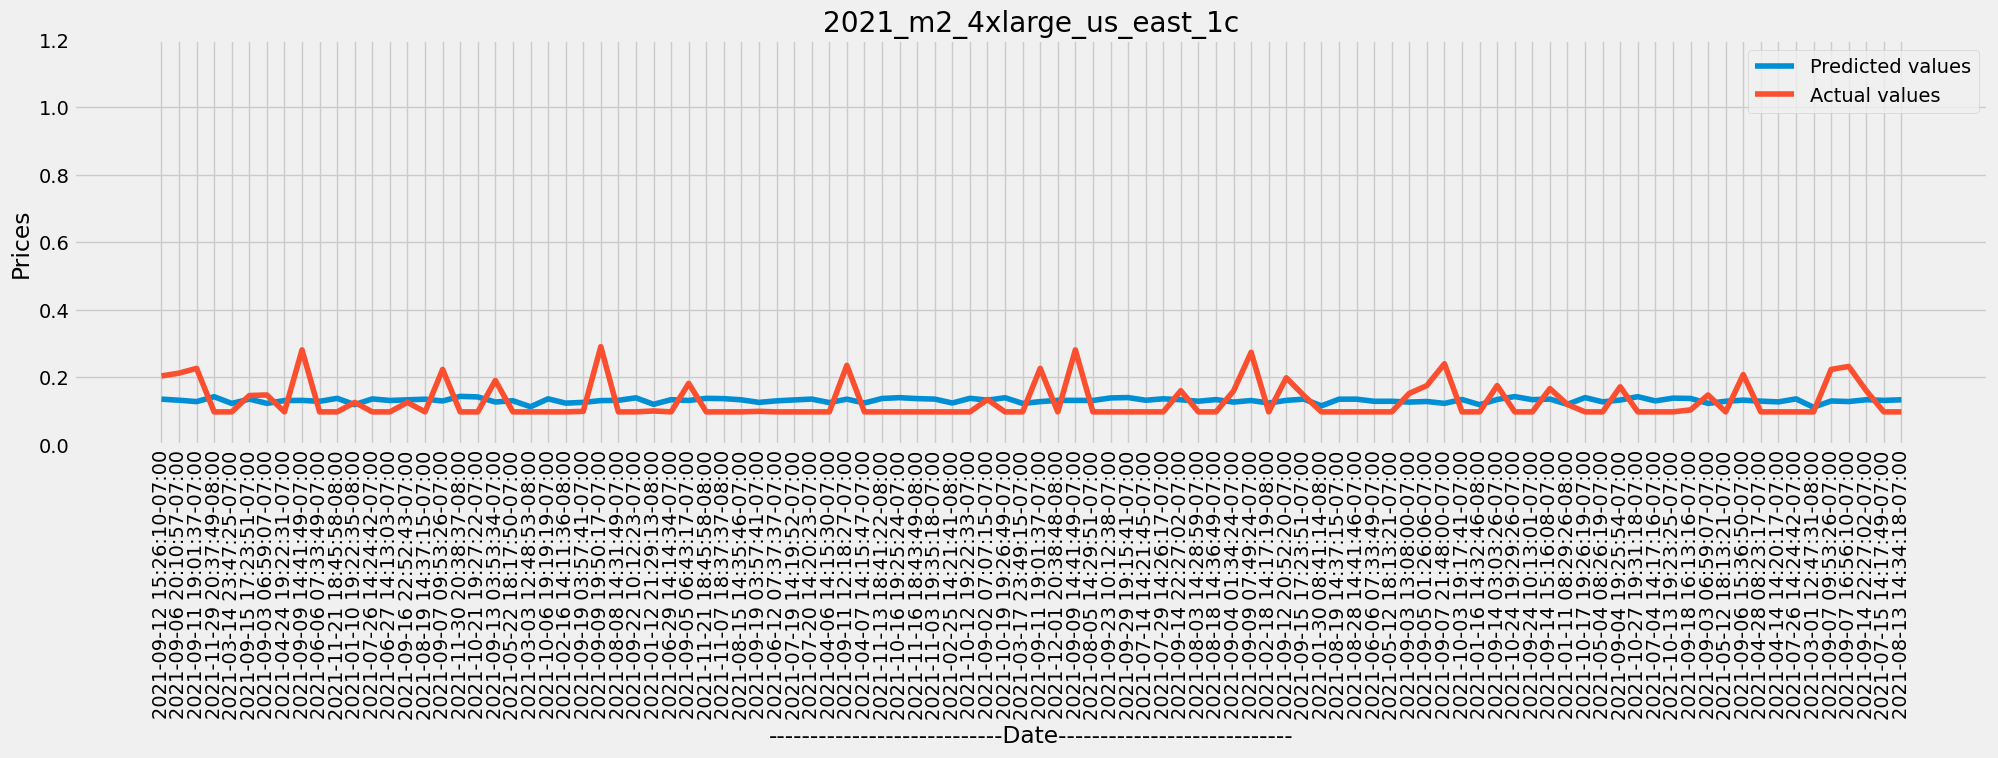

Epoch 1/5
6/6 [==============================] - 10s 34ms/step - loss: 0.0722
Epoch 2/5
6/6 [==============================] - 0s 34ms/step - loss: 0.0231
Epoch 3/5
6/6 [==============================] - 0s 35ms/step - loss: 0.0190
Epoch 4/5
6/6 [==============================] - 0s 35ms/step - loss: 0.0195
Epoch 5/5
25/25 [==============================] - 0s 6ms/step
r2 Test: -2.604987984526097e+29
mse Test: 0.00020068097456671055
rmse Test: 0.014166191251240065
MAPE Test: 0.13679636695061895
MAE Test: 0.01340604396116066


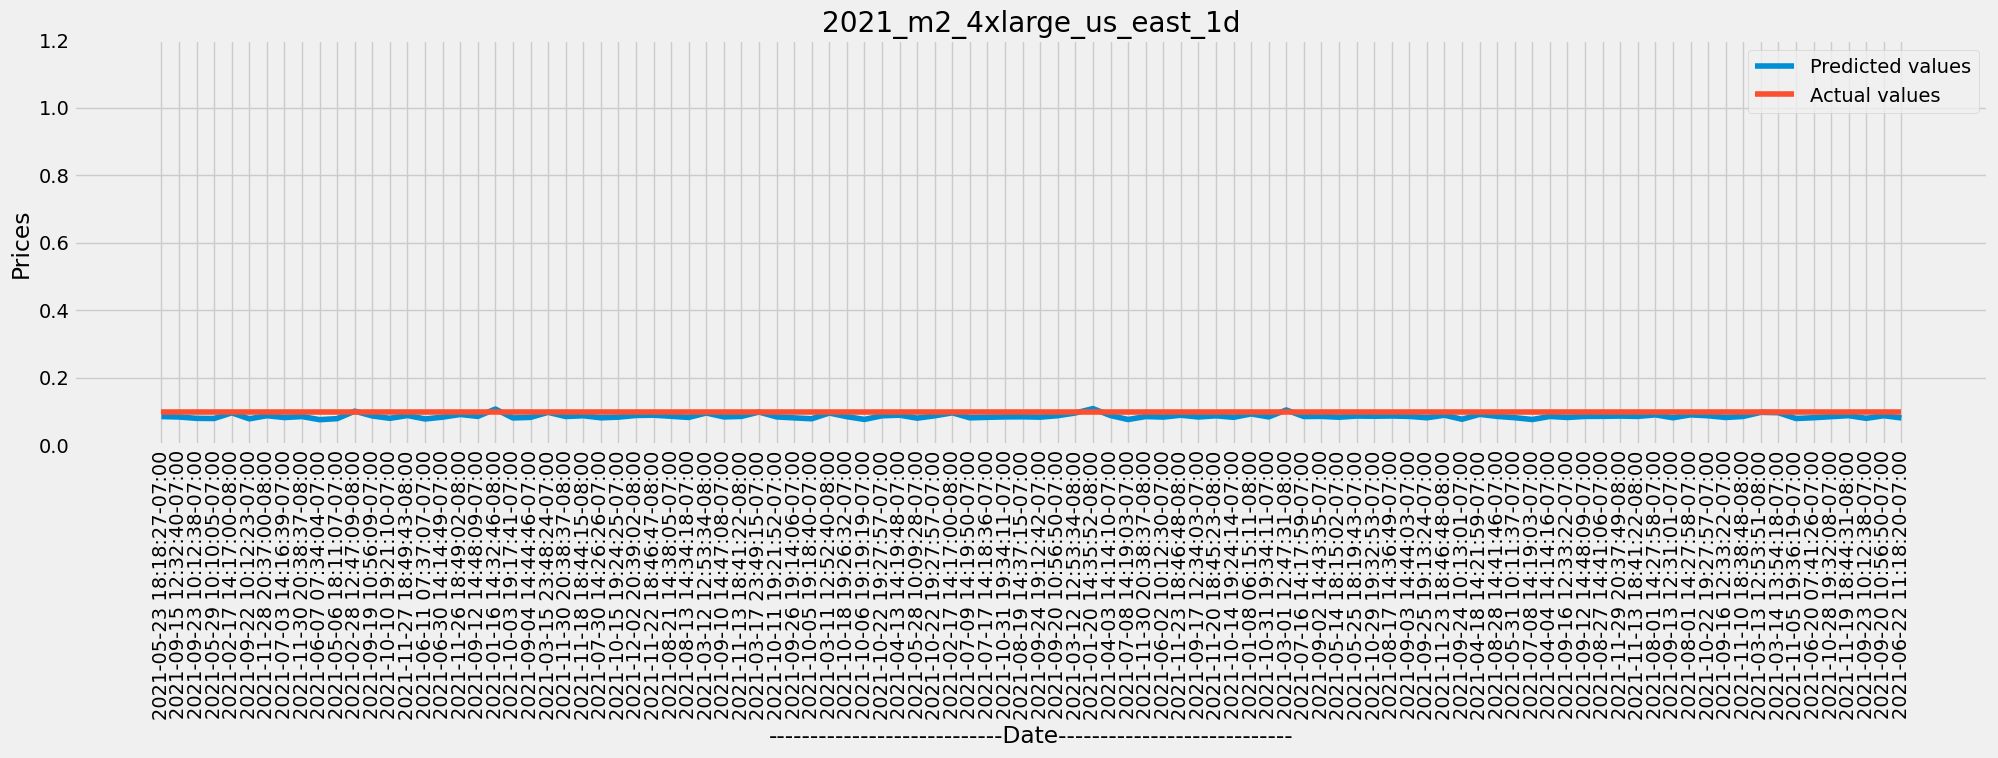

In [6]:
files=['/content/drive/MyDrive/Colab Notebooks/Cloud/2021_m2_4xlarge_us_east_1a',
       '/content/drive/MyDrive/Colab Notebooks/Cloud/2021_m2_4xlarge_us_east_1b',
       '/content/drive/MyDrive/Colab Notebooks/Cloud/2021_m2_4xlarge_us_east_1c',
       '/content/drive/MyDrive/Colab Notebooks/Cloud/2021_m2_4xlarge_us_east_1d']
for fileName in files:
  data_path = fileName
  data = pd.read_csv(data_path, delimiter=',', header=None, low_memory=False)
  data.columns = ['Price', 'Date','OS','year', 'month','day', 'hour', 'minute', 'second']
  data = data.drop(0)
  data.isna().any(axis=1).sum()
  data_temp = data
  data.dropna(axis=1)
  data_y = data['Price']
  data_x = data.drop(['Price'], axis=1)
  data_y = data_y.reset_index()
  data_x = data_x.reset_index()
  data_y = data_y.drop(['index'], axis=1)
  data_y['Price'] = data_y['Price'].astype(float)
  data_x = data_x.drop(['Date','OS','index'], axis=1)
  data_x = data_x.astype(float)
  X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state=42, shuffle = False)
  trainAcc = []
  testAcc = []

  # The GRU architecture
  regressorGRU2 = Sequential()
  # First GRU layer with Dropout regularisation
  regressorGRU2.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
  regressorGRU2.add(Dropout(0.2))
  # Second GRU layer
  regressorGRU2.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
  regressorGRU2.add(Dropout(0.2))
  # Third GRU layer
  regressorGRU2.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
  regressorGRU2.add(Dropout(0.2))
  # Fourth GRU layer
  regressorGRU2.add(GRU(units=50, activation='tanh'))
  regressorGRU2.add(Dropout(0.2))
  # The output layer
  regressorGRU2.add(Dense(units=1))

  # Compiling the RNN
  regressorGRU2.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
  # Fitting to the training set
  regressorGRU2.fit(X_train,Y_train,epochs=5,batch_size=150)

  y_pred_test = regressorGRU2.predict(X_test)
  y_pred_train = regressorGRU2.predict(X_train)
  testAcc.append(mean_absolute_percentage_error(Y_test, y_pred_test))
  MAE_test = mean_absolute_error(Y_test, y_pred_test)
  MAPE_test = mean_absolute_percentage_error(Y_test, y_pred_test)
  mse_test = mean_squared_error(Y_test, y_pred_test)
  rmse_test = np.sqrt(mse_test)
  r2_test = r2_score(Y_test, y_pred_test)
  print(f"r2 Test: {r2_test}")
  print(f"mse Test: {mse_test}")
  print(f"rmse Test: {rmse_test}")
  print(f"MAPE Test: {MAPE_test}")
  print(f"MAE Test: {MAE_test}")
  Y_test_array = Y_test['Price'].values
  Y_test_array = np.array(Y_test_array)
  test_range = Y_test['Price'].values
  x_values = np.arange(len(Y_test_array))
  test_array = [float(value) for value in test_range.tolist()]
  Y_test_array = Y_test['Price'].values

  tested_data_index = Y_test.iloc[:, :0]
  Y_test_data = pd.DataFrame(Y_test, index=tested_data_index.index)
  dfilter = pd.DataFrame(index=tested_data_index.index)
  filteredList = dfilter.index.tolist();
  i = 0
  j = 0
  dictionary_Predict_value = {}
  dictionary_Test_value = {}

  for val in y_pred_test:
    dictionary_Predict_value[filteredList[i]]=val
    i=i+1
  for val in Y_test['Price'].values:
    dictionary_Test_value[filteredList[j]]=float(val)
    j=j+1

  Y_test_data = pd.DataFrame(Y_test, index=Y_test.index)
  Y_test_index = Y_test_data[Y_test_data['Price'].notna()]
  linux_values = pd.DataFrame(index=Y_test_index.index).index.tolist()
  test_array_ = []
  pred_array_ = []
  x_values = []
  for key in linux_values:
    test_array_.append(dictionary_Test_value[key])
    pred_array_.append(dictionary_Predict_value[key])
    x_values.append(data_temp.iloc[key]['Date'])

  x_lables = np.arange(len(x_values))
  test_array_values = [float(value) for value in test_array_]
  pred_array_values = [float(value) for value in pred_array_]
  rcParams['figure.figsize'] = 22, 5
    # Plot the data
  plt.plot(pred_array_values[0:100])

  plt.plot(test_array_values[0:100])

  plt.ylim(0, 1.2)
  # plt.yticks([0,0.05,0.10,0.15,0.20,.25,.30,.35,.40,.45,.50,.55,.60])
  # plt.yticks([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,.08,.09,.10])

    #plt.xlim(0, 150)
  plt.xticks(x_lables[0:100], x_values[0:100], rotation=90)
  plt.legend(['Predicted values','Actual values'])
    # Add labels and legend
  plt.ylabel('Prices')
  plt.xlabel("----------------------------Date----------------------------")
  plt.title(fileName.split('/')[-1])
    # Show the plot
  plt.show();
